In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/aaaaaa/Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
# Encoding

df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first = True,dtype=int)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [18]:
X_train.shape, X_test.shape

((7500, 11), (2500, 11))

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

2025-10-22 09:46:18.056408: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761126378.477730     117 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761126378.606980     117 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [58]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [68]:
history = model.fit(X_train_scale,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8590 - loss: 0.3435 - val_accuracy: 0.8493 - val_loss: 0.3525
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8662 - loss: 0.3346 - val_accuracy: 0.8493 - val_loss: 0.3513
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8619 - loss: 0.3381 - val_accuracy: 0.8487 - val_loss: 0.3529
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8579 - loss: 0.3469 - val_accuracy: 0.8493 - val_loss: 0.3577
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8614 - loss: 0.3450 - val_accuracy: 0.8507 - val_loss: 0.3512
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8543 - loss: 0.3576 - val_accuracy: 0.8520 - val_loss: 0.3534
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8615 - loss: 0.3422 - val_accuracy: 0.8493 - val_loss: 0.3519
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8593 - loss: 0.3448 - val_accuracy: 0.

In [70]:
# weights of first layer

model.layers[0].get_weights()

[array([[-3.55070025e-01, -1.94891453e-01, -4.93965119e-01,
         -4.82479818e-02,  3.89582306e-01,  4.32265848e-01,
         -4.26061451e-01, -1.92040503e-01,  1.34248435e-01,
         -8.77833784e-01,  2.41975859e-01],
        [-6.25442624e-01,  4.25743490e-01,  6.02700472e-01,
          2.88534500e-02, -1.27366734e+00,  1.00793648e+00,
         -7.54932538e-02,  8.80588830e-01,  3.79424959e-01,
         -2.90858537e-01,  1.35277712e+00],
        [ 4.55281705e-01,  4.13076639e-01,  3.75560045e-01,
          1.70417223e-02,  2.93162391e-02,  2.43377045e-01,
         -1.20206796e-01,  8.02547485e-02,  3.09139997e-01,
         -6.76046610e-01, -1.63186565e-01],
        [-3.17469090e-02, -2.49236226e-01, -1.48422986e-01,
          3.78397077e-01, -6.84411675e-02, -2.32366711e-01,
          1.82671785e-01,  3.92368436e-01, -2.42142696e-02,
          1.56622276e-01, -2.49664634e-01],
        [ 6.07409894e-01,  3.82029384e-01,  7.16286063e-01,
          1.67746818e+00,  8.14116836e-01, -

In [71]:
# weight for second layer

model.layers[1].get_weights()

[array([[-0.07886115,  0.3664081 ,  0.4293164 ,  0.25064892,  0.11385342,
          0.31980726,  0.6659436 ,  0.4097511 , -0.05159211, -0.13677962,
         -0.25621337],
        [ 0.5207853 ,  0.20351219,  0.39571962,  0.1589058 ,  0.14905266,
         -0.21581677, -0.5844223 , -0.40162513, -0.1360115 ,  0.3586498 ,
          0.33287743],
        [ 0.4983955 ,  0.562679  , -0.47897354, -0.40477955,  0.26885128,
         -0.5636048 , -0.27046746,  0.18048726, -0.27960604,  0.40543678,
         -0.6942139 ],
        [-1.6743553 , -1.3823829 ,  2.3572946 , -1.1491957 , -1.9068352 ,
         -0.12805131, -1.004751  , -1.9056795 ,  0.36231324,  1.9461995 ,
          0.48759064],
        [-0.39967272,  0.38818032, -0.06451804,  1.0612426 ,  0.2280716 ,
         -0.07159159,  1.1070193 ,  0.2546235 , -0.09201406, -0.21363638,
         -0.92142606],
        [-0.32187283,  0.2622944 ,  0.26502258, -0.6119295 ,  0.22626878,
         -0.07714536, -0.40915075,  0.45357746, -0.21980597,  0.0715626

In [72]:
# prediction

y_log = model.predict(X_test)

y_pred = np.where(y_log>0.5,1,0)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_test,y_pred)

0.208

In [75]:
history.history

{'accuracy': [0.8603333234786987,
  0.859666645526886,
  0.8573333621025085,
  0.8576666712760925,
  0.8601666688919067,
  0.8588333129882812,
  0.8600000143051147,
  0.8603333234786987,
  0.8604999780654907,
  0.8601666688919067,
  0.8581666946411133,
  0.859499990940094,
  0.85916668176651,
  0.8606666922569275,
  0.8610000014305115,
  0.8616666793823242,
  0.859499990940094,
  0.8631666898727417,
  0.8619999885559082,
  0.8588333129882812,
  0.85916668176651,
  0.8610000014305115,
  0.8608333468437195,
  0.8598333597183228,
  0.8606666922569275,
  0.8601666688919067,
  0.8600000143051147,
  0.862333357334137,
  0.8600000143051147,
  0.8619999885559082,
  0.8608333468437195,
  0.8613333106040955,
  0.8610000014305115,
  0.8615000247955322,
  0.8638333082199097,
  0.8615000247955322,
  0.8621666431427002,
  0.8613333106040955,
  0.8606666922569275,
  0.862666666507721,
  0.862666666507721,
  0.8638333082199097,
  0.8616666793823242,
  0.8616666793823242,
  0.862500011920929,
  0.86100

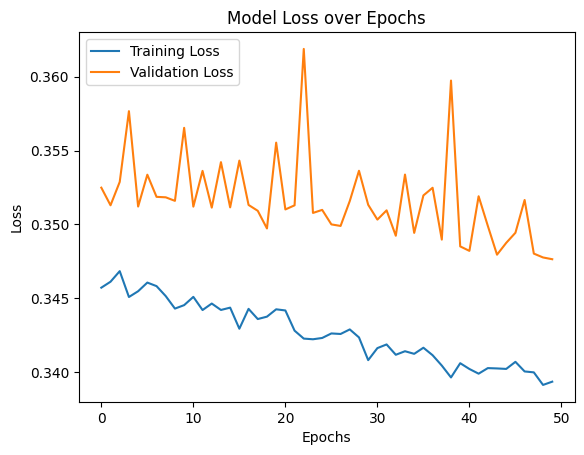

In [79]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


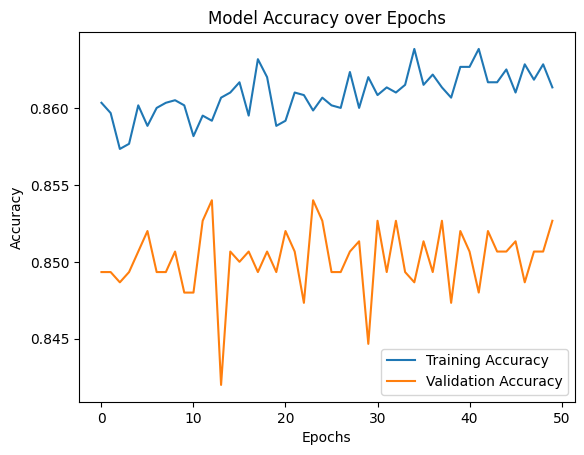

In [80]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
